In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df=pd.read_csv(r'C:\Users\ANKESH AMAN\Downloads\bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [6]:
df2 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.shape

(13320, 5)

In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3=df2.dropna()
df3.shape

(13246, 5)

In [10]:
df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3.shape

(13246, 6)

In [12]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
df3['total_sqft'].dtype

dtype('O')

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
is_float('2100 sqm')

False

In [16]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [17]:
def convert_sqft_to_num(x):
    l=x.split('-')
    if len(l)==2:
        return ((float(l[0])+float(l[1]))/2)
    try:
        return float(x)
    except:
        return None

In [18]:
df3.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                    4
price                 186
BHK                     4
Name: 30, dtype: object

In [19]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4.head(5)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [20]:
df4[df4.total_sqft.notnull()] #check nonmissing value in a dataframe
df4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
BHK                   4
Name: 30, dtype: object

In [22]:
df4.shape

(13246, 6)

In [23]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Dominic Layout                      1
Chikkanahalli                       1
Viswajit Layout                     1
1st Stage Radha Krishna Layout      1
vinayakanagar                       1
Name: location, Length: 1293, dtype: int64

In [24]:
len(location_stats[location_stats>5])

385

In [25]:
len(location_stats)

1293

In [26]:
location_stats.sum()

13246

In [27]:
df5=df4.copy()
df5['price_per_sqft'] =df5.price*100000/df5.total_sqft
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
location_stats=df.location.value_counts()
location_stats

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
Vidyapeeta                          1
Banasawadi,                         1
Neelasandra                         1
Sadduguntepalya                     1
Name: location, Length: 1305, dtype: int64

In [29]:
len(location_stats)

1305

In [30]:
len(location_stats[location_stats>5])

385

In [31]:
location_lesthan_5=location_stats[location_stats<=5]
len(location_lesthan_5)

920

In [32]:
df5['location']=df5.location.apply(lambda x: 'other' if x in location_lesthan_5 else x )
len(df5.location.unique())
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [33]:
df5[df5['total_sqft']/df4['BHK']<300].head(2)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333


In [34]:
df6=df5[~(df5['total_sqft']/df5['BHK']<300)]
df5.shape

(13246, 7)

In [35]:
df6.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [36]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [37]:
def remove_outlier(df):
    dfo=pd.DataFrame()
    for idx,subi in df.groupby('location'):
        m=np.mean(subi.price_per_sqft)
        st=np.std(subi.price_per_sqft)
        reduced_df = subi[(subi.price_per_sqft>(m-st)) & (subi.price_per_sqft<=(m+st))]
        dfo=pd.concat([dfo,reduced_df],ignore_index=True)
    return dfo
df7=remove_outlier(df6)
df7.shape

(10013, 7)

In [38]:
df7.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block HRBR Layout,3 BHK,2300.0,3.0,80.0,3,3478.260870
1,1st Block HRBR Layout,2 BHK,1250.0,2.0,67.0,2,5360.000000
2,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
3,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
4,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333


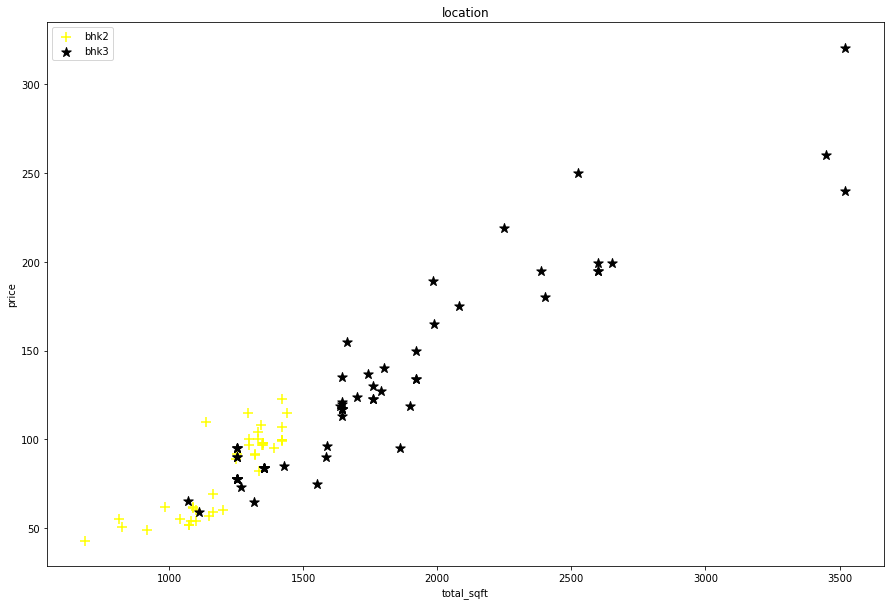

In [39]:
def plot_bhk(df,location):
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,label='bhk2',marker='+',color='yellow',s=100)
    plt.scatter(bhk3.total_sqft,bhk3.price,label='bhk3',marker='*',color='black',s=100)
    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.title('location')
    plt.legend()
    
plot_bhk(df7,'Hebbal') 

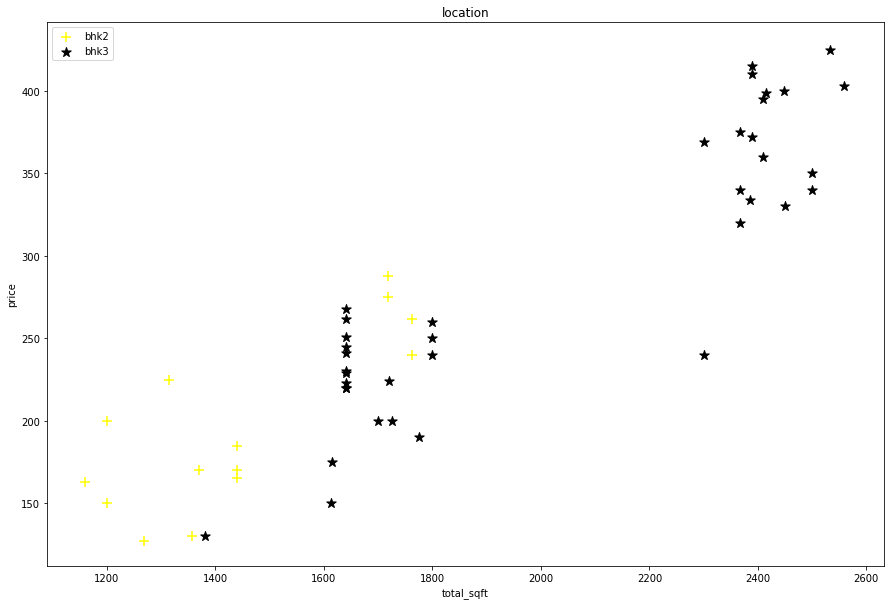

In [40]:
plot_bhk(df7,'Rajaji Nagar')

In [41]:
df7.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block HRBR Layout,3 BHK,2300.0,3.0,80.0,3,3478.260870
1,1st Block HRBR Layout,2 BHK,1250.0,2.0,67.0,2,5360.000000
2,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
3,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
4,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333


In [42]:
def outlier_remover(df):
    ragn=np.array([])
    #bhk_stats={}
    for loc,loc_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in loc_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'st':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in loc_df.groupby('BHK'):
            stt=bhk_stats.get(bhk-1)
            if stt and stt['count']>5:
                ragn=np.append(ragn,bhk_df[bhk_df.price_per_sqft<(stt['mean'])].index.values)
    return df.drop(ragn) 
df8=outlier_remover(df7)
df8.head()        

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block HRBR Layout,3 BHK,2300.0,3.0,80.0,3,3478.260870
1,1st Block HRBR Layout,2 BHK,1250.0,2.0,67.0,2,5360.000000
2,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
3,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
4,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333


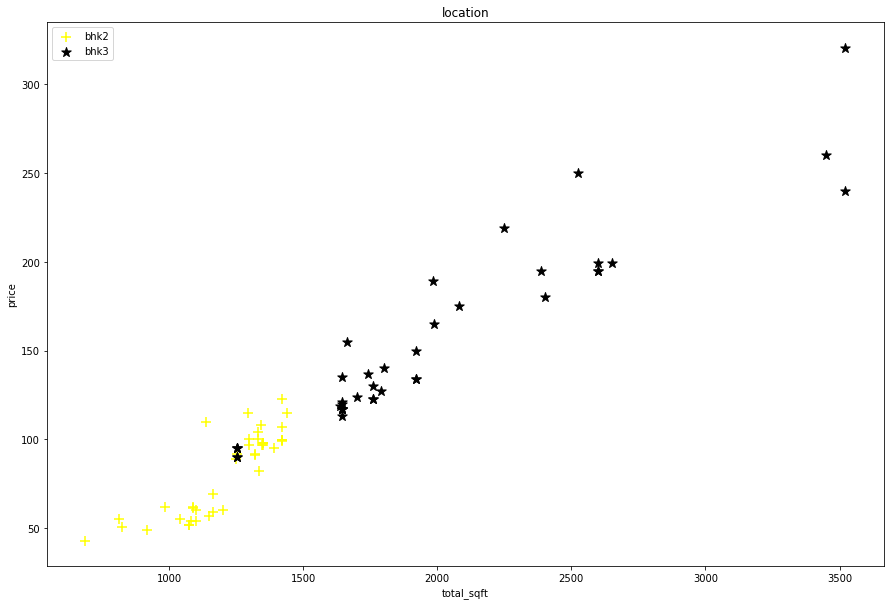

In [43]:
plot_bhk(df8,'Hebbal')

In [44]:
df8.shape

(7595, 7)

In [45]:
df8[df8.bath<df8.BHK+2].shape

(7516, 7)

In [46]:
df9=df8[df8.bath<df8.BHK+2]
df9.shape

(7516, 7)

In [47]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.shape

(7516, 5)

In [48]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Block Hrbr Layout,2nd Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,3rd Block Hrbr Layout,4th Block Koramangala,...,"Whitefield,",Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,other,south
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df11=pd.concat([df10,dummies.drop('other',axis=1)],axis=1)
df11.shape

(7516, 399)

In [50]:
df12=df11.drop('location',axis=1)
df12.shape

(7516, 398)

In [51]:
#preparing a model

In [52]:
x=df12.drop('price',axis=1)
x.head()

,total_sqft,bath,BHK,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Block Hrbr Layout,2nd Phase JP Nagar,2nd Phase Judicial Layout,...,Whitefield,"Whitefield,",Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,south
0,2300.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2850.0,4.0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1630.0,3.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1875.0,2.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,df11['price'],test_size=0.2)

In [54]:
len(x_test)

1504

In [55]:
y=df10.price

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

def best_model_predictor(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_model_predictor(x_train,y_train)

,model,best_score,best_params
0,linear_regression,-9.171790e+14,{'normalize': False}
1,lasso,6.602721e-01,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,6.930418e-01,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [65]:
df10.head(2)

,location,total_sqft,bath,price,BHK
0,1st Block HRBR Layout,2300.0,3.0,80.0,3
1,1st Block HRBR Layout,1250.0,2.0,67.0,2


In [69]:
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

-4169658579772.045

In [67]:
def predict_price(location,total_sqft,bath,BHK):
    index=np.where(x.columns==location)[0][0] #(give the index of column name)
    arr=np.zeros(len(x.columns))
    arr[0]=total_sqft
    arr[1]=bath
    arr[2]=BHK
    if index>=0:
        arr[index]=1
    return model.predict([arr])[0]   

In [71]:
predict_price('Arekere',2710,6,4)

190.81823995109932

In [ ]:
predict_price('Yeshwanthpur',1855,5,3)

In [ ]:
predict_price('Indira Nagar',1000, 3, 3)

In [ ]:
predict_price('Hebbal',350, 2, 1) #(price of 1 bhk with 2 bathroom in hebbal in lakh)

In [ ]:
predict_price('Hebbal',650, 2, 2) #(price of 2 bhk with 2 bathroom in hebbal in lakh)

In [ ]:
predict_price('Hebbal',1000, 2, 3)#(price of 3 bhk with 2 bathrom in hebbal in lakh)

In [ ]:
predict_price('Yelahanka New Town',1000, 2, 3)#(price of 3 bhk with 2 bathrom with 650 squarefoot in yelahankah new town in lakh)